Exploratory Data Analysis (EDA) is a crucial step in data science projects. It helps in understanding the underlying patterns and relationships in the data. In this tutorial, we will perform EDA on the S&P 500 dataset using Python.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

1. Load the Dataset

The first step is to load the dataset. We will be using the S&P 500 dataset, which contains stock prices of the 500 largest publicly traded companies in the United States. The dataset can be downloaded from Kaggle

In [2]:
df = pd.read_csv('all_stocks_5yr.csv')

2. Explore the Dataset

The next step is to explore the dataset. We can use the head() method to view the first few rows of the dataset.

In [3]:
# View the first few rows of the dataset
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.shape

(619040, 7)

In [5]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


From the output, we can see that the dataset has 16924 rows and 6 columns. The columns are date, open, high, low, close, and volume. All columns have non-null values.

3. Data Cleaning

The next step is to clean the data.

- Check for missing values: Use the **isnull()** method to check for missing values in the dataset. If there are any missing values, decide whether to remove them or fill them with appropriate values.
- Check for duplicates: Use the **duplicated()** method to check for any duplicate rows in the dataset. If there are any duplicate rows, decide whether to remove them or keep them.
- Convert data types: Check if the data types of each column are appropriate for analysis. For example, the date column should be in datetime format instead of a string.
- Rename columns: Rename the columns if necessary for better readability and understanding.
- Remove irrelevant columns: Remove any columns that are not necessary for analysis or are redundant.
- Handle outliers: Check for outliers in the data and decide whether to remove them or keep them.
- Standardize data: Standardizing the data helps to bring all the columns to the same scale, which makes it easier to compare the columns. You can standardize the data using the StandardScaler class from the sklearn.preprocessing module.

In [7]:
df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dropna(subset=['open'], inplace=True)

In [10]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [12]:
# Rename columns
df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}, inplace=True)

In [13]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,619029,2015-08-18 00:45:31.033280,2013-02-08 00:00:00,2014-05-20 00:00:00,2015-08-21 00:00:00,2016-11-15 00:00:00,2018-02-07 00:00:00,NaN
Open,619029.0,83.023334,1.62,40.22,62.59,94.37,2044.0,97.378769
High,619029.0,83.778419,1.69,40.62,63.15,95.18,2067.99,98.207735
Low,619029.0,82.2562,1.5,39.83,62.02,93.54,2035.11,96.507634
Close,619029.0,83.043305,1.59,40.2408,62.62,94.41,2049.0,97.388913
Volume,619029.0,4321891.930249,101.0,1070351.0,2082165.0,4284550.0,618237630.0,8693671.06388


In [14]:
df.describe(include='object').T

,count,unique,top,freq
Name,619029,505,AAL,1259


After performing the above additional data cleaning steps, you can move on to the next step in EDA, which is to visualize the data.

4. Data Visualization

The next step is to visualize the data. We can use various types of plots to visualize the patterns and relationships in the data. Here, we will use the matplotlib and seaborn libraries to create plots.

In [15]:
Cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns.tolist()

print("Numarical Columns\n")
print(num_col)

Numarical Columns

['date', 'Open', 'High', 'Low', 'Close', 'Volume']


date


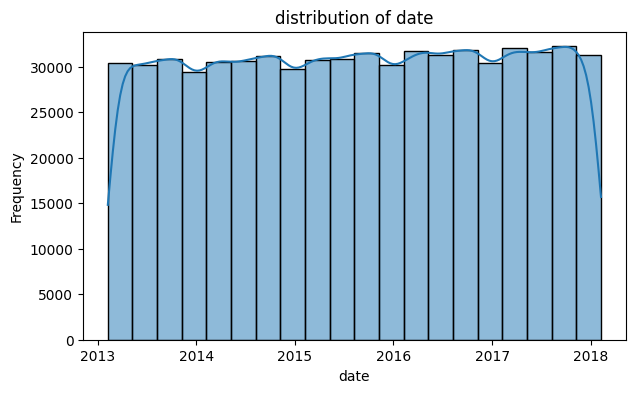

Open


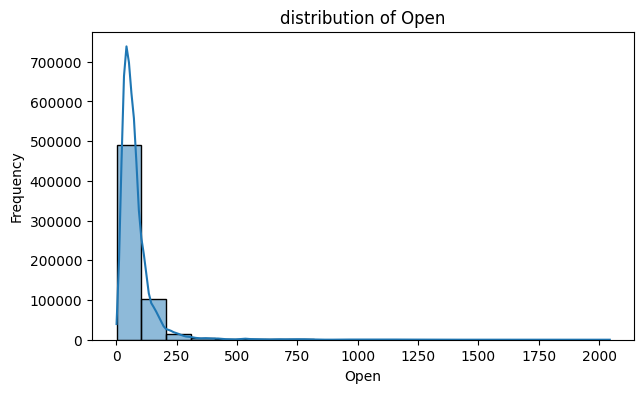

High


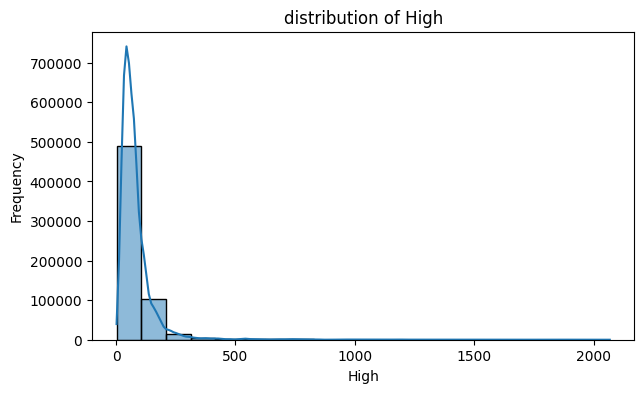

Low


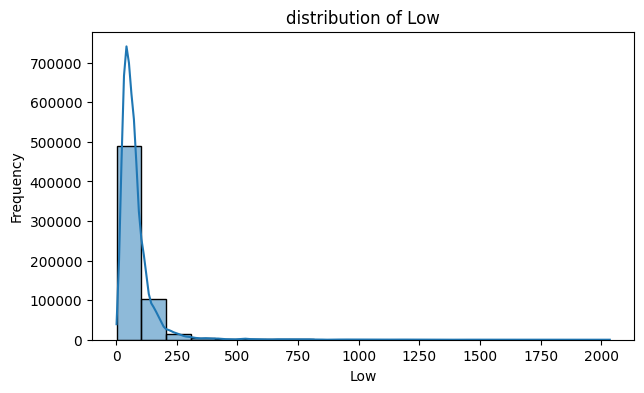

Close


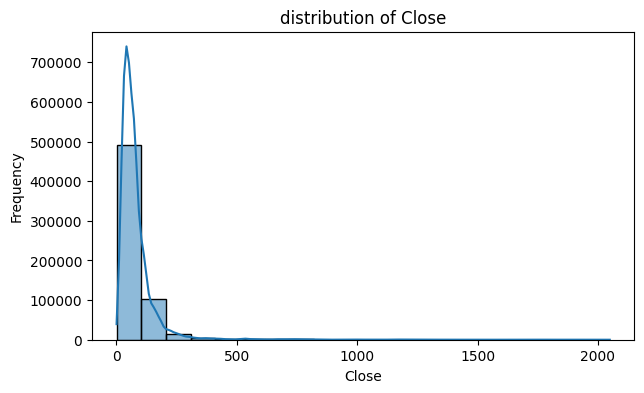

Volume


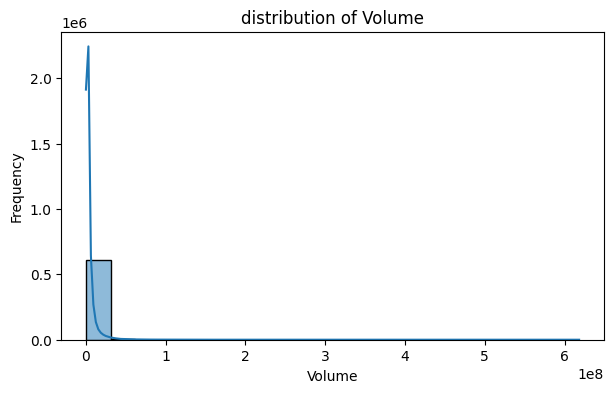

In [16]:
for col in num_col:
    print(col)
    
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.ylabel('Frequency')
    plt.title(f'distribution of {col}')
    plt.show()

In [17]:
df['Name'].value_counts()

Name
AAL     1259
NOV     1259
NLSN    1259
NKE     1259
NI      1259
        ... 
DXC      215
BHGE     152
BHF      142
DWDP     109
APTV      44
Name: count, Length: 505, dtype: int64

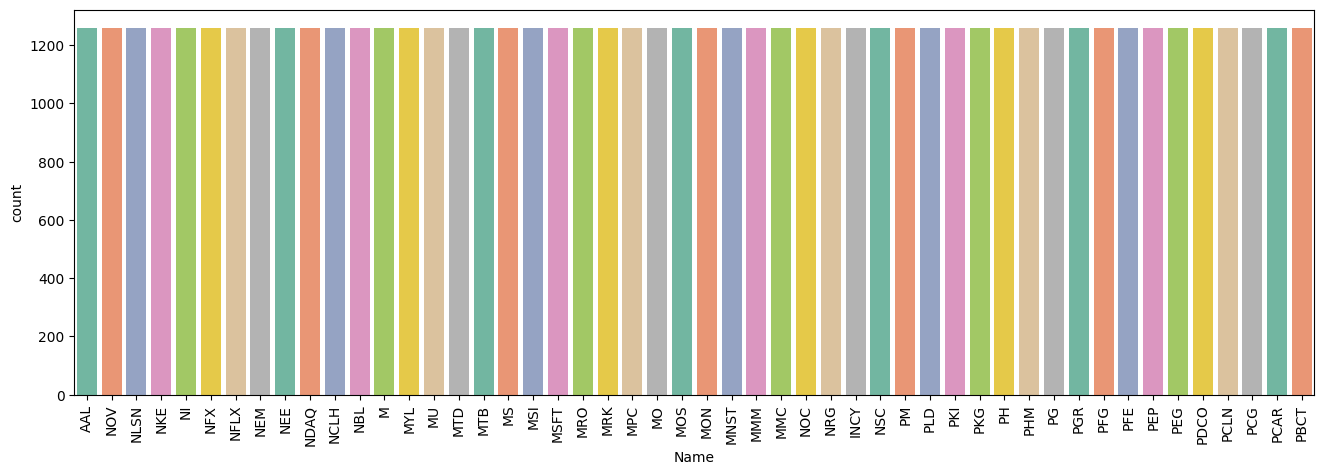

In [18]:
plt.figure(figsize=(16, 5))
sns.countplot(x='Name', data=df, order=df['Name'].value_counts().head(50).index, palette='Set2')
plt.xticks(rotation=90)
plt.show()

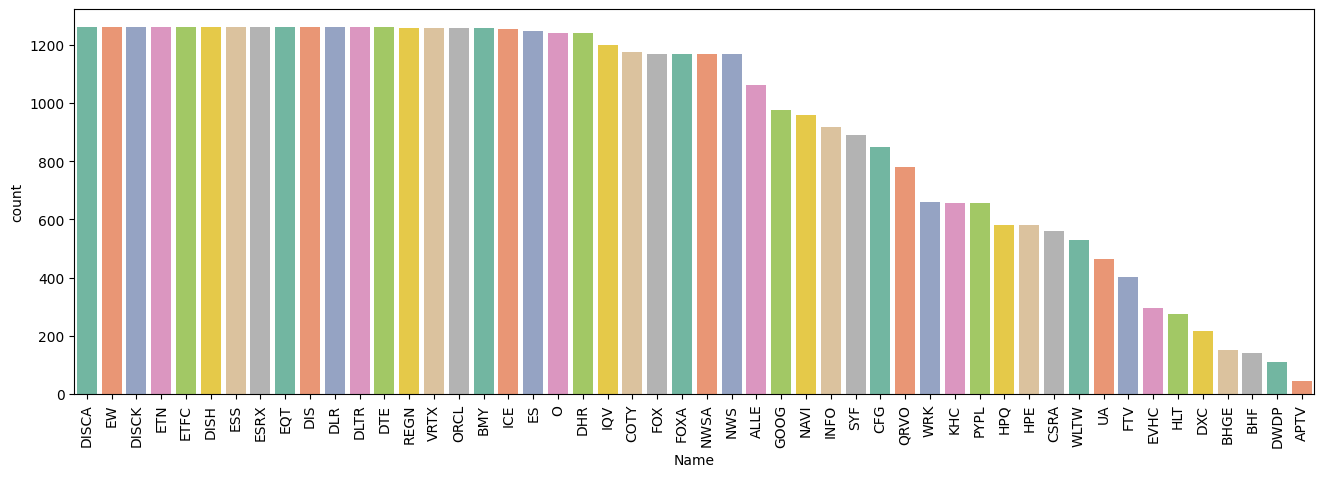

In [19]:
plt.figure(figsize=(16, 5))
sns.countplot(x='Name', data=df, order=df['Name'].value_counts().tail(50).index, palette='Set2')
plt.xticks(rotation=90)
plt.show()

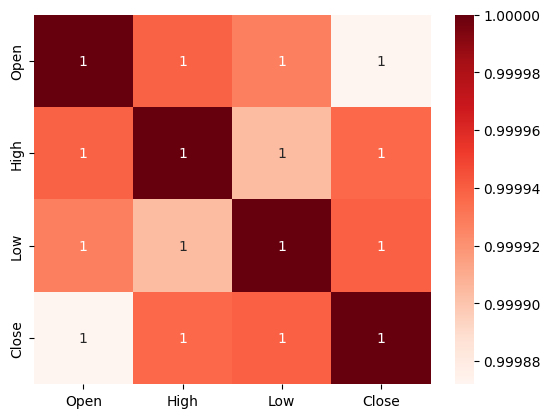

In [20]:
corr = df[['Open', 'High', 'Low', 'Close']].corr('pearson')
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
df.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

We can create a line plot of the closing stock prices over time using the matplotlib library.

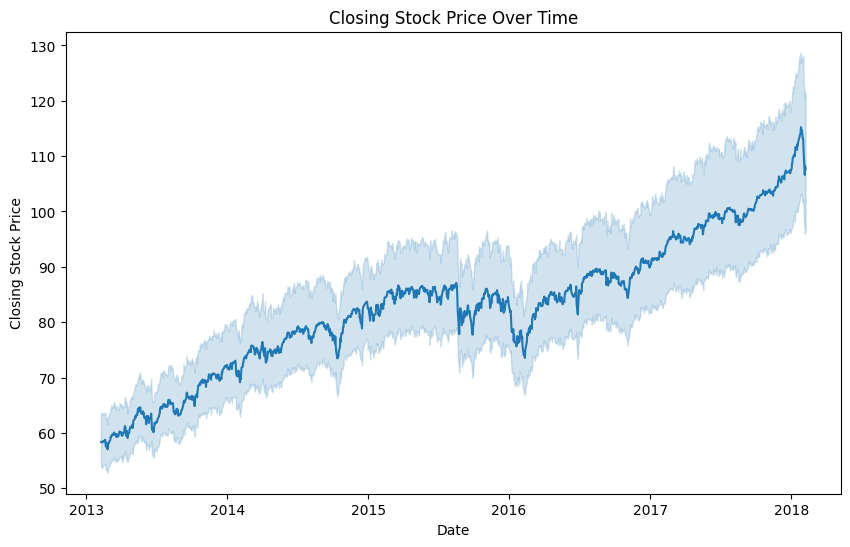

In [22]:
# Line chart of closing stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='Close', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

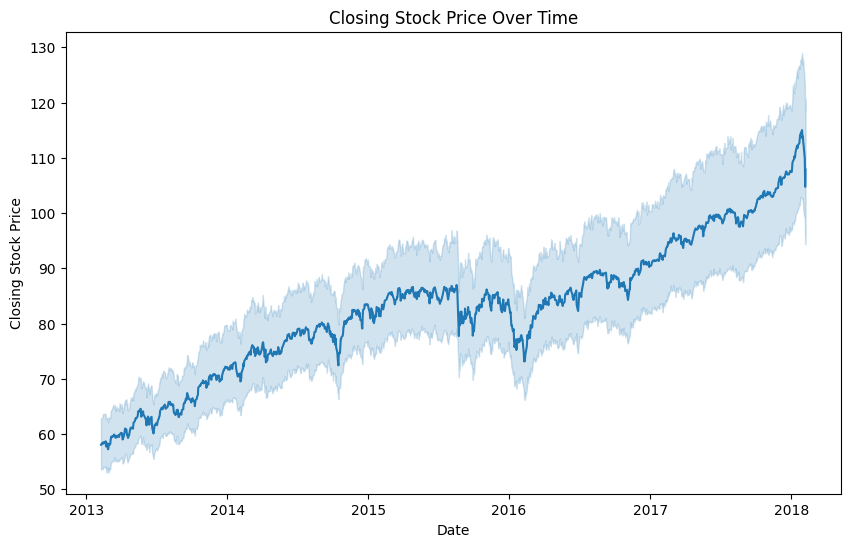

In [23]:
# Line chart of Opening stock price over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='Open', data=df)
plt.title('Closing Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

We can also visualize the stock prices for individual companies using a line chart. We can filter the dataset based on the company name and plot the closing stock price over time.

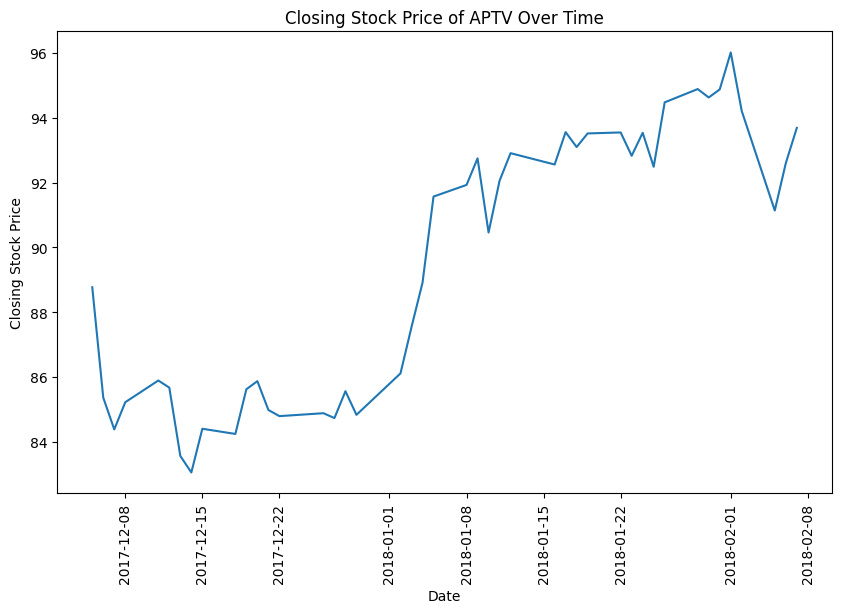

In [28]:
# Line chart of closing stock price for a specific company over time
company_name = 'APTV'
company_df = df[df['Name']==company_name]
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='Close', data=company_df)
plt.title(f'Closing Stock Price of {company_name} Over Time')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.show()

We can also visualize the stock prices for multiple companies using a line chart. We can use a loop to filter the dataset based on the company name and plot the closing stock price over time.

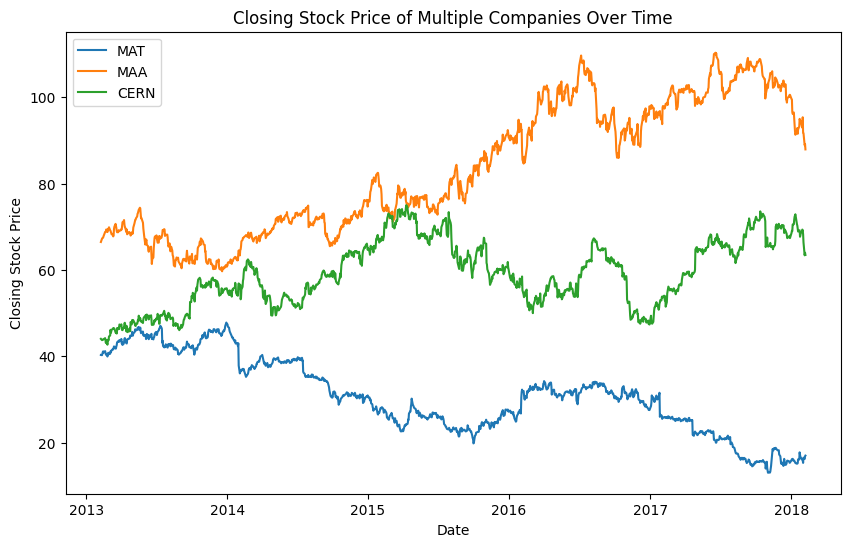

In [25]:
# Line chart of closing stock price for multiple companies over time
companies = ['MAT', 'MAA', 'CERN']
plt.figure(figsize=(10, 6))
for company in companies:
    company_df = df[df['Name']==company]
    sns.lineplot(x='date', y='Close', data=company_df, label=company)
plt.title('Closing Stock Price of Multiple Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Stock Price')
plt.legend()
plt.show()

To visualize the daily returns, 

The line chart will show the percentage change in price from one day to the next.

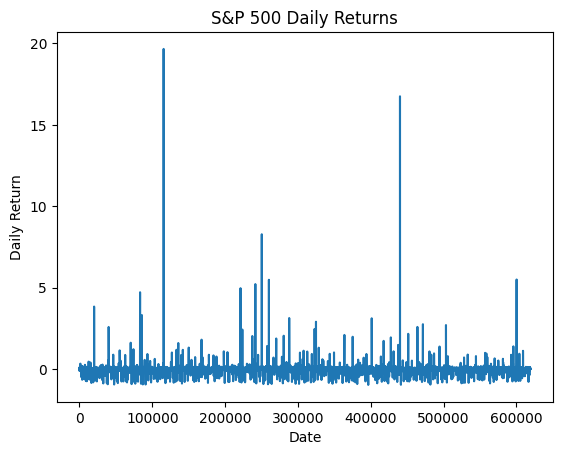

In [26]:
daily_returns = df['Close'].pct_change()

# Create a line chart of the daily returns
plt.plot(daily_returns.index, daily_returns.values)
plt.title('S&P 500 Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()
#This will create a line chart showing the daily returns over time.

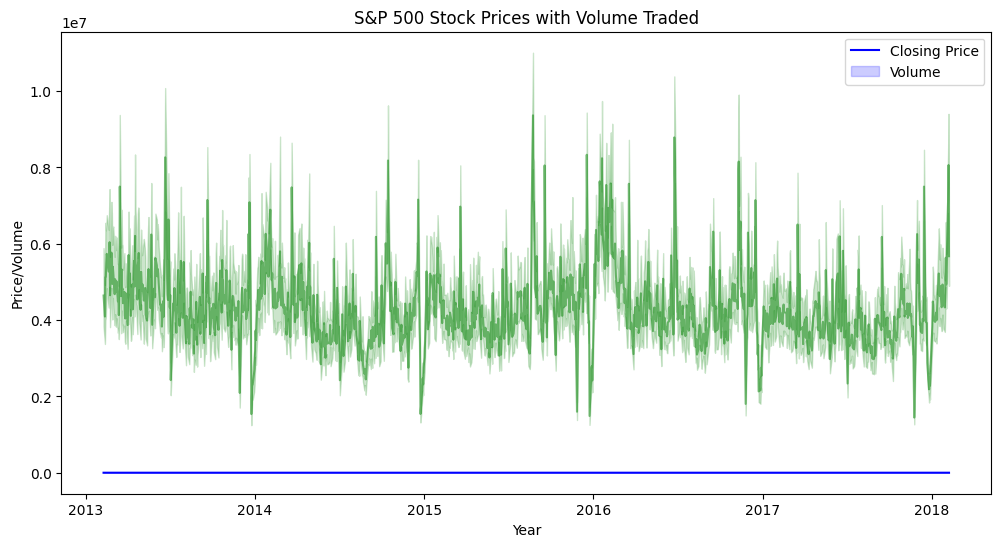

In [27]:
# Create a combination plot of stock prices and volume traded
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='Close', data=df, color='b')
sns.lineplot(x='date', y='Volume', data=df, color='g', alpha=0.5)
plt.title('S&P 500 Stock Prices with Volume Traded')
plt.xlabel('Year')
plt.ylabel('Price/Volume')
plt.legend(['Closing Price', 'Volume'])
plt.show()

In conclusion, Exploratory Data Analysis (EDA) is an essential step in data science projects, and it provides a better understanding of the underlying patterns and relationships in the data. In this tutorial, we performed EDA on the S&P 500 dataset using Python.

We started by loading the dataset and exploring it to understand its structure and contents. We also performed data cleaning to ensure that the data was in the correct format and removed any missing or duplicated values.

After that, we visualized the data using various charts, such as line plots, heat maps, and histograms. We visualized the stock prices, returns, and trading volumes of the S&P 500 companies over time.

Overall, the visualizations showed that the S&P 500 index has steadily grown over time, with some periods of volatility. The returns of individual companies have also varied, with some outperforming the index, and others underperforming. Additionally, we observed a correlation between the trading volumes and stock prices of the companies.

EDA provides valuable insights into the data, and the visualizations help to communicate these insights effectively. By performing EDA, we can identify trends, patterns, and relationships that may not be immediately apparent from the data. This knowledge can then be used to inform further analysis and decision-making